<a href="https://colab.research.google.com/github/DenShum/A-B-test/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22A_B_%D1%82%D0%B5%D1%81%D1%82_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Используя тестовые данные рассчитайте 3 метрики. Для каждой метрики:

● Посчитайте среднее

● Посчитайте медиану

● Посчитайте 95-персентиль

● Визуализируйте распределение частотным графиком и boxplot (“ящиком с усами”)


Метрики:

1 - Выполненные поездки: Ride_completed

2 - Ввод данных маршрута: Price_seen

3 - Дистанция, км: Distance

4 - Возраст: Age


In [ ]:
import pandas as pd
df = pd.read_csv('/content/Netology_A_B-testing_HW_1.csv')
print(df.shape) #количество стр. и столб.
df.info()
# df = df.apply(pd.to_numeric,errors='coerce') #меняем тип данных на числовые
# df.describe().T

(101500, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101500 entries, 0 to 101499
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         101500 non-null  int64  
 1   date               101500 non-null  object 
 2   user_id            101500 non-null  int64  
 3   hour               101500 non-null  int64  
 4   app_opened         101500 non-null  int64  
 5   price_seen         101500 non-null  int64  
 6   order_made         101500 non-null  int64  
 7   surge              91431 non-null   object 
 8   ride_completed     101500 non-null  int64  
 9   user_cancelled     101500 non-null  int64  
 10  age                101500 non-null  int64  
 11  os                 101500 non-null  object 
 12  city_center_order  101500 non-null  int64  
 13  order_class        101500 non-null  object 
 14  distance           91431 non-null   float64
 15  rfm                101500 non-null  ob

In [ ]:
df.head(10).T

In [ ]:
df['surge'] = df['surge'].fillna('no surge')# заменяем NaN на 'no surge' в кол.surge
df.loc[(df.distance > 0), 'order_made'] = 1 # ставим 1 в кол.'order_made', если в кол.distance есть расстояние
df.head(10).T # ОЧИЩЕННЫЙ ДАТАФРЕЙМ !!!

Среднее значение и медиану для метрик берем через метод describe():

1 - Выполненные поездки: Ride_completed -0,62 и 1

2 - Ввод данных маршрута: Price_seen -0,73 и 1

3 - Дистанция, км: Distance -5,3 и 4,3 соответственно

4 - Возраст: age - 40,5 и 40 соответственно

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,101500.0,50749.500000,29300.670499,0.000000,25374.750000,50749.500000,76124.250000,101499.000000
user_id,101500.0,549874.802207,258600.104176,100093.000000,328223.000000,548827.000000,773051.000000,999978.000000
hour,101500.0,11.481429,6.917522,0.000000,5.000000,11.000000,17.000000,23.000000
app_opened,101500.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
price_seen,101500.0,0.900798,0.298934,0.000000,1.000000,1.000000,1.000000,1.000000
order_made,101500.0,0.900798,0.298934,0.000000,1.000000,1.000000,1.000000,1.000000
ride_completed,101500.0,0.620365,0.485299,0.000000,0.000000,1.000000,1.000000,1.000000
user_cancelled,101500.0,0.111025,0.314164,0.000000,0.000000,0.000000,0.000000,1.000000
age,101500.0,40.471764,13.536322,18.000000,29.000000,40.000000,52.000000,69.000000
city_center_order,101500.0,0.571675,0.494838,0.000000,0.000000,1.000000,1.000000,1.000000


In [ ]:
q = df['ride_completed'].quantile(0.95) # 95 - персентиль для ride_completed
q

1.0

In [ ]:
q = df['price_seen'].quantile(0.95) # 95 - персентиль для Price_seen
q

1.0

In [ ]:
q = df['distance'].quantile(0.95) # 95 - персентиль для distance
q

13.694289876456237

In [ ]:
q = df['age'].quantile(0.95) # 95 - персентиль для age
q

63.0

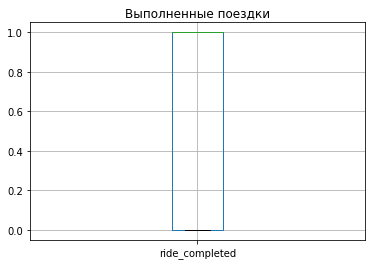

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df['ride_completed'].plot(kind = 'box',title='Выполненные поездки',grid=True)
# Возможно, данную метрику лучше визуализировать другим графиком

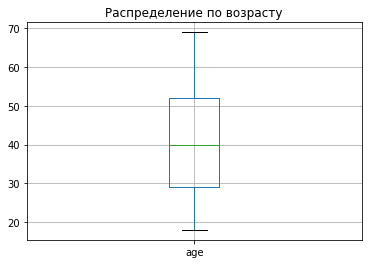

In [ ]:
df['age'].plot(kind = 'box',title='Распределение по возрасту',grid=True)
# на графике видно, что медиана незначительно меньше среднего, распределение ближе к нормальному
# со сдвигом к левому краю, значения после 75-персентиля имеют больший разброс чем после 25-персентиля

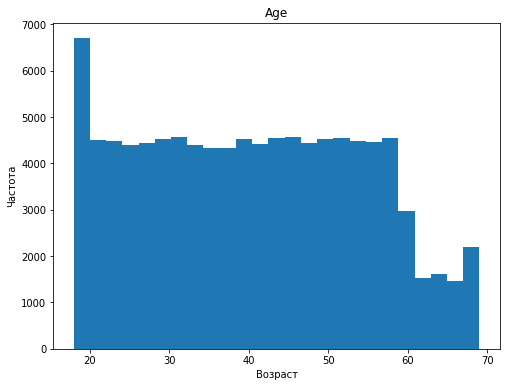

In [ ]:
df['age'].plot(kind='hist',bins=25, figsize=(8,6))
plt.title('Age') 
plt.ylabel('Частота') 
plt.xlabel('Возраст') 
plt.show()

(array([4548., 2155., 2237., 2269., 2228., 2249., 2212., 2187., 2222.,
        2211., 2254., 2267., 2305., 2255., 2160., 2238., 2192., 2139.,
        2171., 2161., 2226., 2297., 2279., 2138., 2224., 2320., 2266.,
        2301., 2261., 2188., 2270., 2258., 2219., 2320., 2242., 2237.,
        2237., 2221., 2278., 2263., 2236.,  739.,  782.,  755.,  838.,
         782.,  721.,  737.,  735., 1470.]),
 array([18.  , 19.02, 20.04, 21.06, 22.08, 23.1 , 24.12, 25.14, 26.16,
        27.18, 28.2 , 29.22, 30.24, 31.26, 32.28, 33.3 , 34.32, 35.34,
        36.36, 37.38, 38.4 , 39.42, 40.44, 41.46, 42.48, 43.5 , 44.52,
        45.54, 46.56, 47.58, 48.6 , 49.62, 50.64, 51.66, 52.68, 53.7 ,
        54.72, 55.74, 56.76, 57.78, 58.8 , 59.82, 60.84, 61.86, 62.88,
        63.9 , 64.92, 65.94, 66.96, 67.98, 69.  ]),
 <a list of 50 Patch objects>)

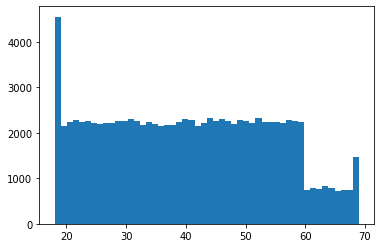

In [ ]:
plt.hist(df['age'], bins=50)

(array([38533.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
        62967.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ]),
 <a list of 25 Patch objects>)

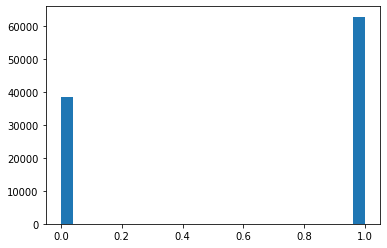

In [ ]:
plt.hist(df['ride_completed'], bins=25)

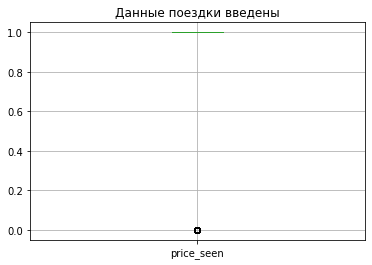

In [ ]:
df['price_seen'].plot(kind = 'box',title='Данные поездки введены',grid=True)
# Возможно, данную метрику лучше визуализировать другим графиком

(array([10069.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
        91431.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ]),
 <a list of 25 Patch objects>)

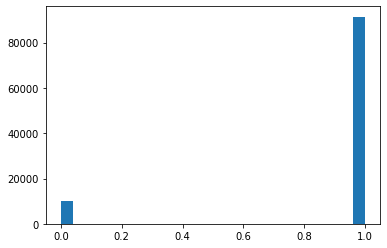

In [ ]:
plt.hist(df['price_seen'], bins=25)

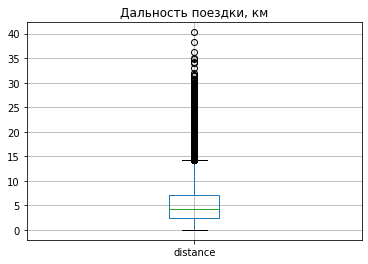

In [ ]:
df['distance'].plot(kind = 'box',title='Дальность поездки, км',grid=True)
# на графике видно медиану-в районе 4, которая немного меньше среднего, распределение ближе к Гамме-распределению
# значения после 75-персентиля имеют больший разброс чем после 25-персентиля,
# есть много выбросов (поездки на далекие расстояния)

(array([1.2213e+04, 2.1074e+04, 1.8284e+04, 1.3087e+04, 8.6120e+03,
        5.8530e+03, 3.9790e+03, 2.7000e+03, 1.8870e+03, 1.3210e+03,
        8.6900e+02, 5.7500e+02, 3.7600e+02, 2.2200e+02, 1.7800e+02,
        8.0000e+01, 5.1000e+01, 3.2000e+01, 2.4000e+01, 6.0000e+00,
        1.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.09464561e-02, 1.62126724e+00, 3.23158802e+00, 4.84190880e+00,
        6.45222958e+00, 8.06255036e+00, 9.67287115e+00, 1.12831919e+01,
        1.28935127e+01, 1.45038335e+01, 1.61141543e+01, 1.77244751e+01,
        1.93347958e+01, 2.09451166e+01, 2.25554374e+01, 2.41657582e+01,
        2.57760790e+01, 2.73863997e+01, 2.89967205e+01, 3.06070413e+01,
        3.22173621e+01, 3.38276829e+01, 3.54380037e+01, 3.70483244e+01,
        3.86586452e+01, 4.02689660e+01]),
 <a list of 25 Patch objects>)

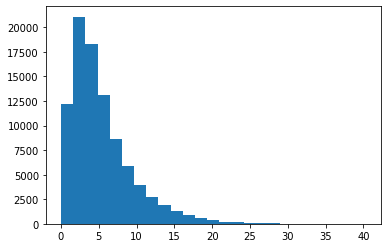

In [ ]:
plt.hist(df['distance'], bins=25)

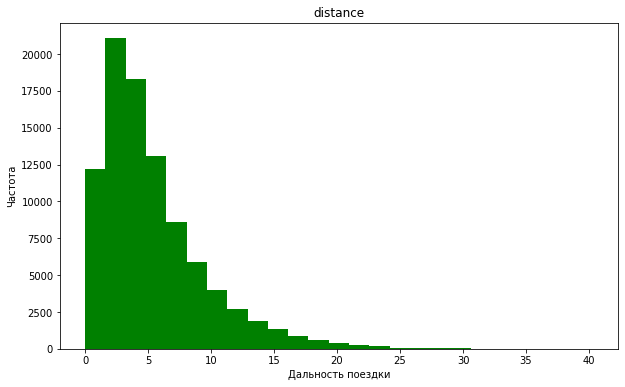

In [ ]:
df['distance'].plot(kind='hist',bins=25, figsize=(10,6),color='g')
plt.title('distance') 
plt.ylabel('Частота') 
plt.xlabel('Дальность поездки') 
plt.show()